# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load libraries
import pickle
import csv
import glob

from tqdm import *
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import numpy as np
import cv2
import random

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.contrib.layers import flatten

# TODO: Fill this in based on where you saved the training and testing data

#Import data
training_file = './data/train.p'
validation_file = './data/valid.p'
testing_file = './data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print("X_train shape:", X_train.shape)
print("X_valid shape:", X_valid.shape)
print("X_test shape:", X_test.shape)

/home/david/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


X_train shape: (34799, 32, 32, 3)
X_valid shape: (4410, 32, 32, 3)
X_test shape: (12630, 32, 32, 3)


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# Number of training examples
n_train = len(X_train)

# Number of testing examples.
n_test = len(X_test)

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

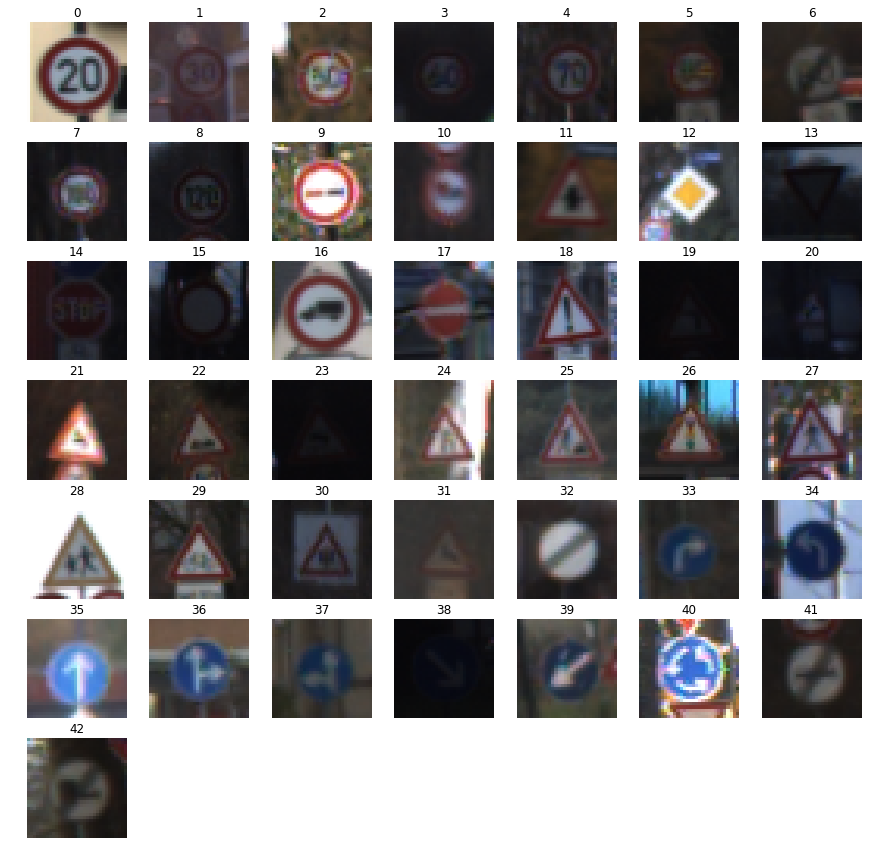

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.

# Visualizations will be shown in the notebook.
plt.figure(figsize=(15, 15))
for i in range(0, n_classes):
    plt.subplot(7, 7, i+1)
    x_selected = X_train[y_train == i]
    plt.imshow(x_selected[0, :, :, :])
    plt.title(i)
    plt.axis('off')
plt.show()

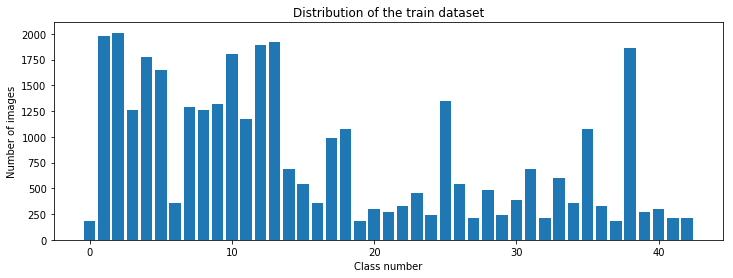

Min number of images per class = 180
Max number of images per class = 2010


In [4]:
#Plot number of images per class
def histogram():
    plt.figure(figsize=(12, 4))
    plt.bar(range(0, n_classes), np.bincount(y_train))
    plt.title("Distribution of the train dataset")
    plt.xlabel("Class number")
    plt.ylabel("Number of images")
    plt.show()

    print("Min number of images per class =", min(np.bincount(y_train)))
    print("Max number of images per class =", max(np.bincount(y_train)))
    
histogram()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Step 2.1: Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [5]:
def preprocess(data):
    data_gry = np.sum(data/3, axis=3, keepdims = True)
    return (data_gry - 128)/128

X_train_normalize = preprocess(X_train)
X_valid_normalize = preprocess(X_valid)
X_test_normalize = preprocess(X_test)

### Question 1

_Describe how you preprocessed the data. Why did you choose that technique?_

At first I thought that keeping the color in the images might be a good idea, because not all the traffic signs have the same colors. However, the Pierre Sermanet and Yann LeCun results show that I can get better results through a grayscale in addition to increasing the speed, so I decided to use this technique. For this I found several functions like tf.image.rgb_to_grayscale () but I found that it was a bit slow. Another option was OpenCV, but it only gives back height and depth. Numpy's "newaxis" feature allowed me to add back the additional 'depth' of 1 so I did not need to redo my neural network. Finally I found another possibility, which although it isn't very accurate, greatly accelerates the preprocessing of the images.

In addition I normalized the images following the technique provided in the project, despite having looked for other options such as OpenCV (cv.normalize (img, normalizedImg, 0, 255, cv.NORM_MINMAX)). This helps scale down some of the disparity within the data.

In [6]:
def random_translate(img):
    px = 2
    dx,dy = np.random.randint(-px,px,2)
    M = np.float32([[1,0,dx],[0,1,dy]])
    return cv2.warpAffine(img,M,img.shape[:2])

def random_scaling(img):
    rows,cols = img.shape
    px = np.random.randint(-2,2)
    pts1 = np.float32([[px,px],[rows-px,px],[px,cols-px],[rows-px,cols-px]])
    pts2 = np.float32([[0,0],[rows,0],[0,cols],[rows,cols]])
    M = cv2.getPerspectiveTransform(pts1,pts2)
    return cv2.warpPerspective(img,M,img.shape[:2])

def rotate_img(img):
    c_x,c_y = int(img.shape[0]/2), int(img.shape[1]/2)
    ang = 30.0*np.random.rand()-15
    Mat = cv2.getRotationMatrix2D((c_x, c_y), ang, 1.0)
    return cv2.warpAffine(img, Mat, img.shape[:2])

#Compute linear image transformation img*s+m
def lin_img(img,s=1.0,m=0.0):
    img2 = cv2.multiply(img, np.array([s]))
    return cv2.add(img2, np.array([m]))

#Change image contrast; s>1 - increase
def contr_img(img, s=1.0):
    m = 127.0*(1.0-s)
    return lin_img(img, s, m)

def augment(img):
    img = contr_img(img, 1.8*np.random.rand()+0.2)
    img = rotate_img(img)
    img = random_translate(img)
    return random_scaling(img)

In [7]:
print('X, y shapes:', X_train_normalize.shape, y_train.shape)

for class_n in range(n_classes):
    class_indices = np.where(y_train == class_n)
    n_samples = len(class_indices[0])
    if n_samples < 800:
        for i in tqdm(range(800 - n_samples), ncols= 100, ascii = True, desc = str(class_n)):
            new_img = augment(X_train_normalize[class_indices[0][i % n_samples]])[:,:,np.newaxis]
            X_train_normalize = np.concatenate((X_train_normalize, [new_img]), axis=0)
            y_train = np.concatenate((y_train, [class_n]), axis=0)
            
print('X, y shapes:', X_train_normalize.shape, y_train.shape)

X, y shapes: (34799, 32, 32, 1) (34799,)


42: 100%|#########################################################| 590/590 [05:30<00:00,  1.63it/s]


X, y shapes: (46480, 32, 32, 1) (46480,)


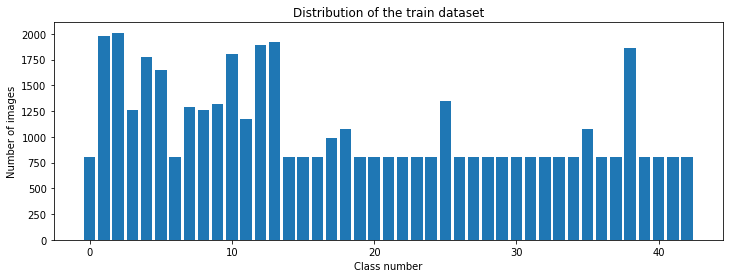

Min number of images per class = 800
Max number of images per class = 2010


In [8]:
histogram()

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

Increasing the data is a good method to increase the accuracy of the model. As you can check in the histogram, there are classes in the data that have many fewer samples than others,
To avoid this problem, the number of images must increase to obtain a uniform distribution. The additional data that are generated from the existing images in each class. The process consists of random adjustment of contrast, rotation, transition and scaling of images.

### Step 2.2: Model Architecture

#### Step 2.2.1: Setup TensorFlow
The `EPOCH` and `BATCH_SIZE` values affect the training speed and model accuracy.

We will use this EPOCHS variable, to tell TensorFlow how many times to rn our training data through the network.
In general, the more epix, the better our model will train, but also the longer training will take

Later we'll also use the batch size variable, to tell TensorFlow, how many training images to run through the network at a time.
The larger the batch size, the faster our model will train, but our processor may have a memory limit on how large a batch it can run

In [9]:
EPOCHS = 60
BATCH_SIZE = 100

#### Step 2.2.2: Implement LeNet-5
Implement the [LeNet-5](http://yann.lecun.com/exdb/lenet/) neural network architecture.

![LeNet](imgs/lenet.png)

First we set more hyper parameters. In this case both hyper parameters relate to how we initialize our weights.

Then, we build the first convolutional layer. This layer has a 5x5 filter, with an input depth of one, and an output depht of six. We alse initialize the bias.
Then we use the conv2D function to convolve the filter over the images, and we add the bias at the end. The formula for convolutions tells us that the output height equals, the input height minus the filter height, plus one all divided by the vertical stride. In this case, that means (32-5+1)/1=28. The formula works the same way for the output with, which alse equals 28. So our convolutional layer output is 28x28x6.
Next, we activate the output of the convolutional layer, in this case with a Relu activation function. Then we pool the output,using the 2x2 kernel with a 2x2 stride, which gives us a pooling output of 14x14x6.

The network then runs through another set of convolutional activation and pooling layers, giving an output of 5x5x16.

Then we flatten this output into a vector. The length of the vector is 5x5x16=400.
We pass this vector into a fully connected layer, with a width of 120.Then we apply a Relu activation to the output of this fully connected layer. We repeat that pattern again this time with a layer width of 84.

Finally, we attach a fully connected output layer with a width, equal to the number of classes in our label set. In this case, we have ten classes. One for each digit, so the with of the output layer is 43. This outputs are also known as our logits, wich is what we return from the LeNet function.

In [10]:
def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.elu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.elu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.elu(fc1)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.elu(fc2)

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

#### tf.Variable
The tf.Variable class creates a tensor with an initial value that can be modified. This tensor stores its state in the session, so you must initialize the state of the tensor manually. You'll use the tf.global_variables_initializer() function to initialize the state of all the Variable tensors.
    
#### tf.truncated_normal
Choosing weights from a normal distribution prevents any one weight from overwhelming other weights. You'll use the tf.truncated_normal() function to generate random numbers from a normal distribution.
The tf.truncated_normal() function returns a tensor with random values from a normal distribution whose magnitude is no more than 2 standard deviations from the mean.
    
#### conv2d
Computes a 2-D convolution given 4-D input and filter tensors.
Given an input tensor of shape [batch, in_height, in_width, in_channels] and a filter/kernel tensor of shape [filter_height, filter_width, in_channels, out_channels], this op performs the following:
1. Flattens the filter to a 2-D matrix with shape [filter_height * filter_width * in_channels, output_channels].
2. Extracts image patches from the input tensor to form a virtual tensor of shape [batch, out_height, out_width, filter_height * filter_width * in_channels].
3. For each patch, right-multiplies the filter matrix and the image patch vector.

#### Activation.
Activation functions are functions that decide, given the inputs into the node, what should be the node's output?
Because it's the activation function that decides the actual output, we often refer to the outputs of a layer as its "activations".
ReLU, a non-linear function, or rectified linear unit. The ReLU function is 0 for negative inputs and x for all inputs x>0.

#### Pooling
The pooling ops sweep a rectangular window over the input tensor, computing a reduction operation for each window (average, max, or max with argmax). Each pooling op uses rectangular windows of size ksize separated by offset strides.
For example, if strides is all ones every window is used, if strides is all twos every other window is used in each dimension, etc.

#### Step 2.2.3: Modified LeNet Model Architecture
*adapted from Sermanet/LeCunn traffic sign classification journal article*

![LeNet2](imgs/modifiedLeNet.jpeg)

In [11]:
def LeNet2(x):
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    print("conv1 shape:",conv1.get_shape())
    
    # Activation.
    conv1 = tf.nn.elu(conv1)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.elu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    ppp = conv2
    
    # Layer 3: Convolutional. Output = 1x1x400.
    conv3_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 400), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(400))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b
    
     # Activation.
    conv3 = tf.nn.elu(conv3)
    
    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(ppp)
    print("fc0 shape:", fc0.get_shape())

    # Flatten. Input = 5x5x16. Output = 400.
    fc1   = flatten(conv3)
    print("fc1 shape:", fc1.get_shape())
    
    # Concat layer2flat and x. Input = 400 + 400. Output = 800
    concat_x = tf.concat([fc1, fc0], 1)
    print("concat_x shape:",concat_x.get_shape())
    
    # Dropout
    concat_x = tf.nn.dropout(concat_x, keep_prob)
    
    # Layer 4: Fully Connected. Input = 800. Output = 43.
    fc2_W = tf.Variable(tf.truncated_normal(shape=(800, 43), mean = mu, stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(43))
    logits   = tf.matmul(concat_x, fc2_W) + fc2_b
    
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._

I began by implementing the same architecture from the LeNet Lab, with no changes since my dataset is in grayscale. This model worked quite well to begin with, but I also implemented the Sermanet/LeCun model from their traffic sign classifier paper and saw an immediate improvement. The layers are set up like this:
1.  5x5 convolution (32x32x1 in, 28x28x6 out)
2.  ELU
3.  2x2 max pool (28x28x6 in, 14x14x6 out)
4.  5x5 convolution (14x14x6 in, 10x10x16 out)
5.  ELU
6.  2x2 max pool (10x10x16 in, 5x5x16 out)
7.  5x5 convolution (5x5x6 in, 1x1x400 out)
8.  ELu
9.  Flatten layers from numbers 8 (1x1x400 -> 400) and 6 (5x5x16 -> 400)
10. Concatenate flattened layers to a single size-800 layer
11. Dropout layer
12. Fully connected layer (800 in, 43 out)

### Step 2.3: Features and Labels
Train LeNet to classify [MNIST](http://yann.lecun.com/exdb/mnist/) data.
Here, we set up our TensorFlow variables.

1. x is a placeholder that will store our input batches. We initialize the batch size to None, wich allows the placeholder to later accept a batch of any size, and we set the image dimensions to 32x32x1.
2. y stores our labels. In this case, our labels come through with sparse variables, which just means that they're integers. They aren't one-hot encoded yet.

#### tf.placeholder:
tf.placeholder() returns a tensor that gets its value from data passed to the tf.session.run() function, allowing you to set the input right before the session runs.
The None dimension is a placeholder for the batch size. At runtime, TensorFlow will accept any batch size greater than 0.
We use the tf.one_hot function to one-hot encode the labels

In [12]:
tf.reset_default_graph() 

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32) # probability to keep units
one_hot_y = tf.one_hot(y, 43)

### Step 2.4: Train, Validate and Test the Model
A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

Now we set up our training pipeline. First, we have another hyperparameter to tune. The learning rate tells TensorFlow how quickly to update the network's weights

Next, we pass the input data to the LeNet function to calculate our logits
We used the tf.nn.softmax_cross_entropy_with_logits function to compare those logits to the ground truth labels and calculate the cross entropy. Cross entropy is just a measure of how different the logits are
from the ground truth training labels

he tf.reduce_mean function averages the cross entropy from all of the training images

AdamOptimizer uses the Adam algorithm to minimize the loss function similarly to what stochastic gradient descent does. The Adam algorithm is a little more sophisticated than stochastic graadient descent, so it's a good default choice for an optimizer. This is where we use the learning rate hyperparameter that we set earlier

Finally, we run the minimize function on the optimizer which uses backpropagation to update the network and minimize our training loss

In [13]:
rate = 0.0009

logits = LeNet2(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(None, one_hot_y, logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

conv1 shape: (?, 28, 28, 6)
fc0 shape: (?, 400)
fc1 shape: (?, 400)
concat_x shape: (?, 800)


#### Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

The first step is to measure whether a given prediction is correct by comparing the logit prediction to the one-hot encoded ground truth label

The second step in the pipeline is to calculate the model's overall accuracy by averaging the individual prediction accuracies

This function takes a dataset as input, sets some initial variables, and then batches the dataset and runs it through the evaluation pipeline. The evaluate function averages the accuracy of each batch to calculate the total accuracy of the model.

In [14]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, len(X_data), BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / len(X_data)

#### Train the Model
Function to train and validate our model. First, we create the TensorFlow session and initialize the variables

We train over whatever number of epochs has been set in the EPOCHS hyperparameter. At the beginning of each epoch, we  shuffle our training data to ensure that our training isn't biased by the order of the images. Then, we break our training data into batches and train the model on each batch
        
We evaluate the model on our validation data

In [15]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_normalize, y_train = shuffle(X_train_normalize, y_train)
        for offset in tqdm(range(0, len(X_train), BATCH_SIZE), ncols= 100, ascii = True, desc = ("EPOCH {} ".format(i+1))):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_normalize[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 0.5})
            
        validation_accuracy = evaluate(X_valid_normalize, y_valid)
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...



EPOCH 1 : 100%|###################################################| 348/348 [00:29<00:00, 11.97it/s]


Validation Accuracy = 0.544


EPOCH 2 : 100%|###################################################| 348/348 [00:28<00:00, 12.03it/s]


Validation Accuracy = 0.788


EPOCH 3 : 100%|###################################################| 348/348 [00:36<00:00,  9.75it/s]


Validation Accuracy = 0.852


EPOCH 4 : 100%|###################################################| 348/348 [00:36<00:00,  9.60it/s]


Validation Accuracy = 0.884


EPOCH 5 : 100%|###################################################| 348/348 [00:35<00:00,  9.83it/s]


Validation Accuracy = 0.895


EPOCH 6 : 100%|###################################################| 348/348 [00:36<00:00,  9.26it/s]


Validation Accuracy = 0.891


EPOCH 7 : 100%|###################################################| 348/348 [00:36<00:00,  8.98it/s]


Validation Accuracy = 0.903


EPOCH 8 : 100%|###################################################| 348/348 [00:36<00:00,  9.50it/s]


Validation Accuracy = 0.912


EPOCH 9 : 100%|###################################################| 348/348 [00:36<00:00,  9.76it/s]


Validation Accuracy = 0.920


EPOCH 10 : 100%|##################################################| 348/348 [00:35<00:00,  9.64it/s]


Validation Accuracy = 0.923


EPOCH 11 : 100%|##################################################| 348/348 [00:35<00:00, 10.34it/s]


Validation Accuracy = 0.923


EPOCH 12 : 100%|##################################################| 348/348 [00:33<00:00, 10.18it/s]


Validation Accuracy = 0.932


EPOCH 13 : 100%|##################################################| 348/348 [00:34<00:00, 10.42it/s]


Validation Accuracy = 0.939


EPOCH 14 : 100%|##################################################| 348/348 [00:36<00:00,  9.66it/s]


Validation Accuracy = 0.935


EPOCH 15 : 100%|##################################################| 348/348 [00:35<00:00,  9.82it/s]


Validation Accuracy = 0.941


EPOCH 16 : 100%|##################################################| 348/348 [00:36<00:00,  8.83it/s]


Validation Accuracy = 0.940


EPOCH 17 : 100%|##################################################| 348/348 [00:36<00:00,  9.44it/s]


Validation Accuracy = 0.946


EPOCH 18 : 100%|##################################################| 348/348 [00:36<00:00,  9.71it/s]


Validation Accuracy = 0.950


EPOCH 19 : 100%|##################################################| 348/348 [00:36<00:00,  9.19it/s]


Validation Accuracy = 0.954


EPOCH 20 : 100%|##################################################| 348/348 [00:36<00:00,  9.66it/s]


Validation Accuracy = 0.949


EPOCH 21 : 100%|##################################################| 348/348 [00:35<00:00,  9.66it/s]


Validation Accuracy = 0.950


EPOCH 22 : 100%|##################################################| 348/348 [00:36<00:00,  9.66it/s]


Validation Accuracy = 0.946


EPOCH 23 : 100%|##################################################| 348/348 [00:35<00:00,  9.76it/s]


Validation Accuracy = 0.953


EPOCH 24 : 100%|##################################################| 348/348 [00:36<00:00,  9.58it/s]


Validation Accuracy = 0.950


EPOCH 25 : 100%|##################################################| 348/348 [00:36<00:00,  9.50it/s]


Validation Accuracy = 0.955


EPOCH 26 : 100%|##################################################| 348/348 [00:37<00:00,  9.57it/s]


Validation Accuracy = 0.960


EPOCH 27 : 100%|##################################################| 348/348 [00:37<00:00,  9.16it/s]


Validation Accuracy = 0.957


EPOCH 28 : 100%|##################################################| 348/348 [00:33<00:00, 10.31it/s]


Validation Accuracy = 0.954


EPOCH 29 : 100%|##################################################| 348/348 [00:33<00:00, 10.31it/s]


Validation Accuracy = 0.955


EPOCH 30 : 100%|##################################################| 348/348 [00:33<00:00, 10.33it/s]


Validation Accuracy = 0.958


EPOCH 31 : 100%|##################################################| 348/348 [00:34<00:00,  9.82it/s]


Validation Accuracy = 0.954


EPOCH 32 : 100%|##################################################| 348/348 [00:37<00:00,  9.51it/s]


Validation Accuracy = 0.958


EPOCH 33 : 100%|##################################################| 348/348 [00:37<00:00,  9.18it/s]


Validation Accuracy = 0.956


EPOCH 34 : 100%|##################################################| 348/348 [00:37<00:00,  9.38it/s]


Validation Accuracy = 0.957


EPOCH 35 : 100%|##################################################| 348/348 [00:36<00:00,  9.75it/s]


Validation Accuracy = 0.957


EPOCH 36 : 100%|##################################################| 348/348 [00:35<00:00,  9.74it/s]


Validation Accuracy = 0.962


EPOCH 37 : 100%|##################################################| 348/348 [00:36<00:00,  9.59it/s]


Validation Accuracy = 0.957


EPOCH 38 : 100%|##################################################| 348/348 [00:36<00:00,  9.27it/s]


Validation Accuracy = 0.960


EPOCH 39 : 100%|##################################################| 348/348 [00:36<00:00,  9.20it/s]


Validation Accuracy = 0.959


EPOCH 40 : 100%|##################################################| 348/348 [00:37<00:00,  9.25it/s]


Validation Accuracy = 0.961


EPOCH 41 : 100%|##################################################| 348/348 [00:37<00:00,  9.38it/s]


Validation Accuracy = 0.963


EPOCH 42 : 100%|##################################################| 348/348 [00:36<00:00,  9.47it/s]


Validation Accuracy = 0.956


EPOCH 43 : 100%|##################################################| 348/348 [00:34<00:00,  9.71it/s]


Validation Accuracy = 0.953


EPOCH 44 : 100%|##################################################| 348/348 [00:35<00:00, 10.14it/s]


Validation Accuracy = 0.953


EPOCH 45 : 100%|##################################################| 348/348 [00:36<00:00,  9.70it/s]


Validation Accuracy = 0.954


EPOCH 46 : 100%|##################################################| 348/348 [00:35<00:00,  9.75it/s]


Validation Accuracy = 0.959


EPOCH 47 : 100%|##################################################| 348/348 [00:35<00:00,  9.83it/s]


Validation Accuracy = 0.962


EPOCH 48 : 100%|##################################################| 348/348 [00:36<00:00,  9.39it/s]


Validation Accuracy = 0.956


EPOCH 49 : 100%|##################################################| 348/348 [00:38<00:00,  8.24it/s]


Validation Accuracy = 0.966


EPOCH 50 : 100%|##################################################| 348/348 [00:39<00:00,  9.38it/s]


Validation Accuracy = 0.958


EPOCH 51 : 100%|##################################################| 348/348 [00:36<00:00,  9.83it/s]


Validation Accuracy = 0.963


EPOCH 52 : 100%|##################################################| 348/348 [00:36<00:00,  9.59it/s]


Validation Accuracy = 0.964


EPOCH 53 : 100%|##################################################| 348/348 [00:36<00:00,  9.57it/s]


Validation Accuracy = 0.959


EPOCH 54 : 100%|##################################################| 348/348 [00:37<00:00,  9.74it/s]


Validation Accuracy = 0.961


EPOCH 55 : 100%|##################################################| 348/348 [00:36<00:00,  9.55it/s]


Validation Accuracy = 0.959


EPOCH 56 : 100%|##################################################| 348/348 [00:36<00:00,  9.72it/s]


Validation Accuracy = 0.963


EPOCH 57 : 100%|##################################################| 348/348 [00:35<00:00,  9.70it/s]


Validation Accuracy = 0.964


EPOCH 58 : 100%|##################################################| 348/348 [00:35<00:00,  9.84it/s]


Validation Accuracy = 0.959


EPOCH 59 : 100%|##################################################| 348/348 [00:36<00:00,  9.88it/s]


Validation Accuracy = 0.961


EPOCH 60 : 100%|##################################################| 348/348 [00:35<00:00,  9.36it/s]


Validation Accuracy = 0.954
Model saved


In [16]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver2 = tf.train.import_meta_graph('./lenet.meta')
    saver2.restore(sess, "./lenet")
    test_accuracy = evaluate(X_test_normalize, y_test)
    print("Test Set Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Set Accuracy = 0.932


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_

I utilized the AdamOptimizer from within TensorFLow to optimize, which seemed to do better than a regular Gradient Descent Optimizer. Also, I tried a few different batch sizes, but settled at 100. I ran 60 epochs.

For the model hyperparameters, I stuck with a mean of 0 and standard deviation/sigma of 0.1.

- batch size: 100
- epochs: 60
- learning rate: 0.0009
- mu: 0
- sigma: 0.1
- dropout keep probability: 0.5

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

My approach was a little of both. Like I mentioned earlier, I started with pre-defined architectures (LeNet and the Sermanet/LeCun model) and almost all of the tweaking was a process of trial and error.

Batch size after 30 epochs:  
- 150: validation = 0.956
- 100: validation = 0.945

Batch size after 60 epochs:  
- 150: validation = 0.957
- 100: validation = 0.952


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Step 3.1: Load and Output the Images

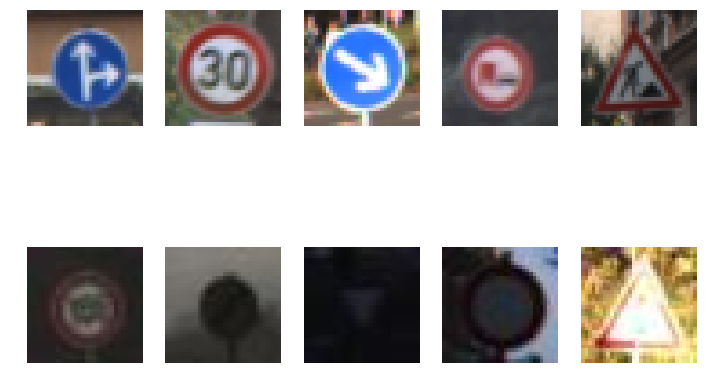

In [17]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

#Import traffic signs class names
signs_class=[]
with open('signnames.csv', 'rt') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=',')
    for row in reader:
        signs_class.append((row['SignName']))

#Import test images  
test_img_paths = [img_path for img_path in glob.glob("./my_images/*")]
test_img=np.uint8(np.zeros((10,32,32,3)))
for i, imp in enumerate(test_img_paths):
    img=cv2.imread(imp, cv2.IMREAD_COLOR)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    test_img[i]=img

#Visualize new raw images
def print_my_images(test_img, title):
    plt.figure(figsize=(12, 8))
    for i in range(10):
        plt.subplot(2, 5, i+1)
        plt.imshow(test_img[i]) 
        if (title == True):
            plt.title(signs_class[signs_classes[i]])
        plt.axis('off')
    plt.show()
    
print_my_images(test_img, title = False)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._

There are 10 traffic signs that have a bit of difference. Some of them were taken at night and others are too bright, so they are a challenge. In addition, some of them are dirty or damaged.

### Predict the Sign Type for Each Image

INFO:tensorflow:Restoring parameters from ./lenet


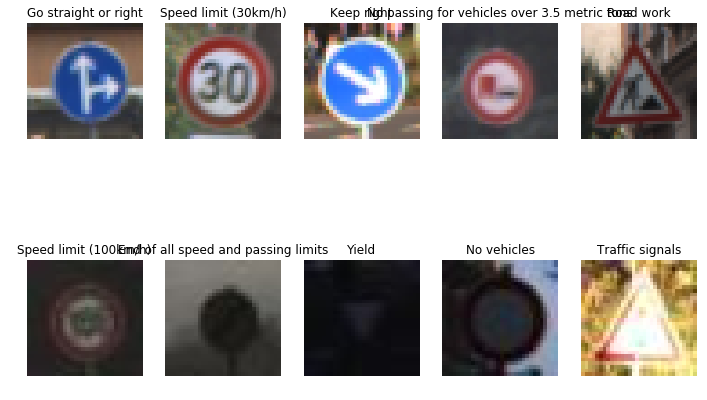

In [18]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
def test_net(X_data, sess):
    pred_sign = sess.run(tf.argmax(logits, 1), feed_dict={x: X_data, keep_prob: 1.0})
    return pred_sign

X_test_data = preprocess(test_img)
    
with tf.Session() as sess:
    saver.restore(sess, './lenet')
    signs_classes=test_net(X_test_data, sess)

print_my_images(test_img, title = True)

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

The model seems to have accurately predicted the new traffic signals very well - even better than the validation accuracy and the test accuracy. It is logical to think that in the real world, by increasing the data set, we can get closer to the precision of ...

In [19]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

def test_net(X_data, sess): 
    prob = sess.run(tf.nn.softmax(logits), feed_dict={x: X_data, keep_prob: 1.0})    
    top_5 = tf.nn.top_k(prob, k=5)
    return sess.run(top_5)


with tf.Session() as sess:
    saver.restore(sess, './lenet')
    signs_top_5=test_net(X_test_data, sess)

INFO:tensorflow:Restoring parameters from ./lenet


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:
```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

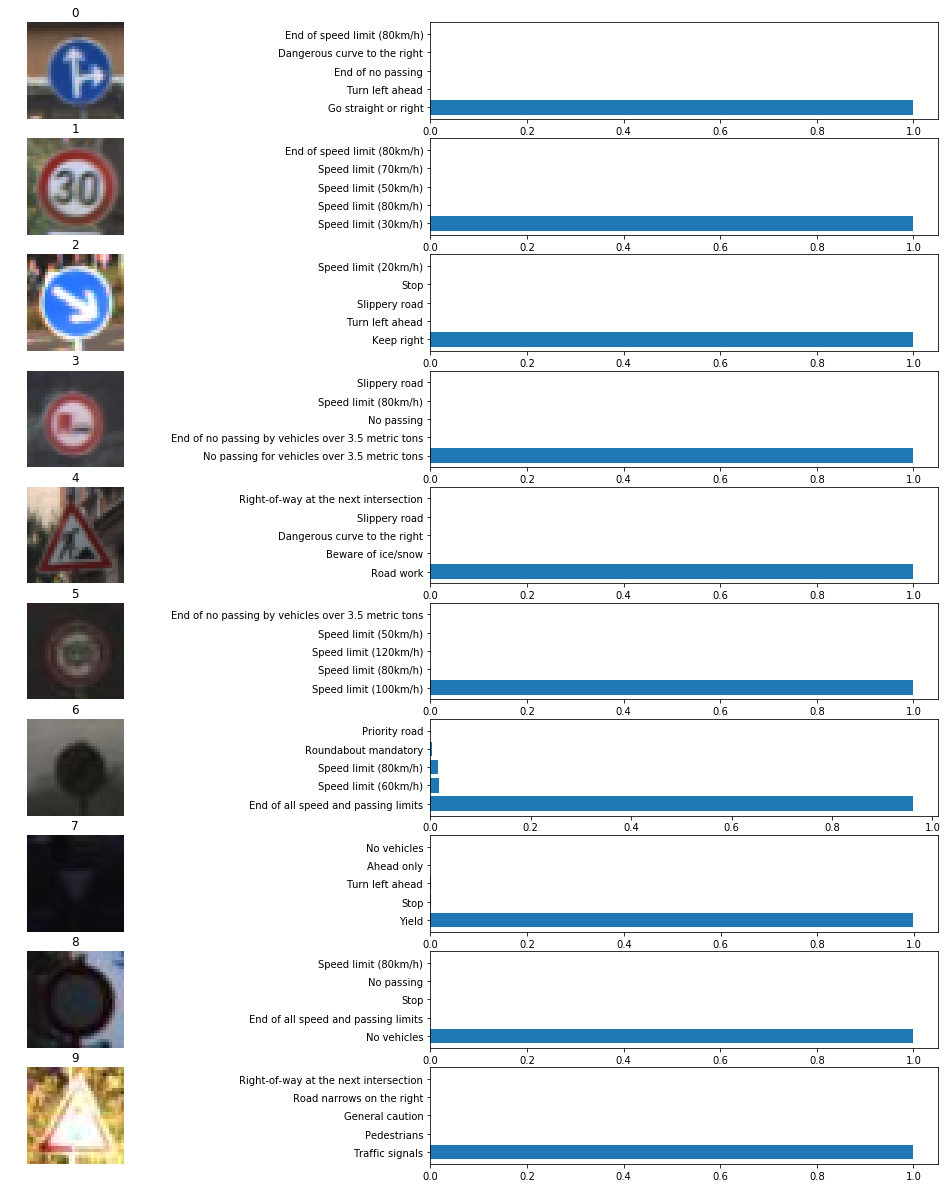

In [20]:
plt.figure(figsize=(20, 21))
for i in range(10):
    plt.subplot(10, 2, 2*i+1)
    plt.imshow(test_img[i]) 
    plt.title(i)
    plt.axis('off')
    plt.subplot(10, 2, 2*i+2)
    plt.barh(np.arange(1, 6, 1), signs_top_5.values[i, :])
    labs=[signs_class[j] for j in signs_top_5.indices[i]]
    plt.yticks(np.arange(1, 6, 1), labs)
plt.show()

The model seems to work correctly in all cases, although in some of them presents a small doubt. However, in this case I find it very difficult to identify the signal, so I am surprised that I can identify the signal so well. This indicates that the model can work quite well in real life.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [21]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")